**Ejercicios Planteados**

El problema que abordaremos es predecir la temperatura máxima para
mañana en una determinada ciudad usando un año de datos meteorológicos anteriores. Usted usará Seattle, WA, pero también puede buscar datos para otra ciudad usando la herramienta de datos climáticos en línea de la NOAA.

Tenemos acceso a un año de temperaturas máximas históricas, las
temperaturas de los dos días anteriores y una estimación de un amigo que siempre afirma saberlo todo sobre el clima. Este es un problema de aprendizaje automático de regresión supervisado. Durante el entrenamiento, para usar random forest debemos darle tanto las características como los objetivos, y debe aprender a asignar los datos a una predicción.

Para esto usará los datos meteorológicos para Seattle, WA de 2016
utilizando la herramienta de datos climáticos en línea de la NOAA. En general, alrededor del 80 % del tiempo dedicado al análisis de datos se dedica a la limpieza y recuperación de datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad. La herramienta NOAA es sorprendentemente fácil de usar y los datos de temperatura se pueden descargar como archivos csv limpios que se pueden analizar. El archivo de trabajo se llama temps.csv que encontrará cargado en la plataforma.

Usted posee las siguientes variables para trabajar:
- year: 2016 para todos los puntos de datos
- month: número del mes del año
- day: número para el día del año
- week: día de la semana como cadena de caracteres
- temp_2: temperatura máxima 2 días antes
- temp_1: temperatura máxima 1 día antes
- average: temperatura máxima promedio histórica
- actual: medición de temperatura máxima
- friend: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio



In [44]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
#Creamos la ruta de temps
ruta_temps = 'temps.csv'

#Leemos el archivo temps.csv
temps = pd.read_csv(ruta_temps)

# Mostramos los primeros 5 registros
print(temps.head())

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  


## *Realice lo siguiente:*

### 1. Para identificar anomalías, obtenga un resumen estadístico, o dicho de otro modo, realice un análisis descriptivo de sus datos, comente.

In [46]:
# Obtener un resumen estadístico de los datos
resumen = temps.describe()

# Imprimir el resumen
print(resumen)

         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179 

In [47]:
# Verificar si hay valores nulos en el conjunto de datos
print(temps.isnull().sum())

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64


### 2. Realice un análisis gráfico de las temperaturas máximas históricas, las temperaturas de los dos días anteriores y la estimación del amigo, con respecto a la fecha. Comente si hay anomalías.

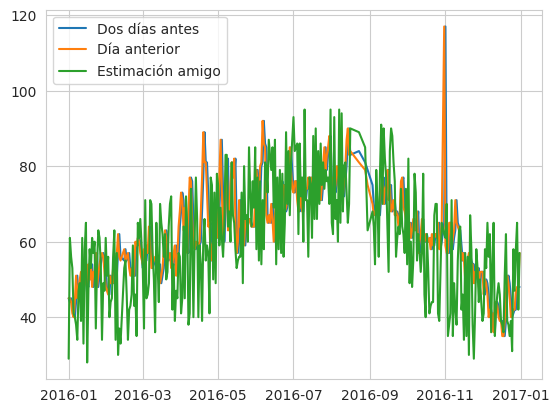

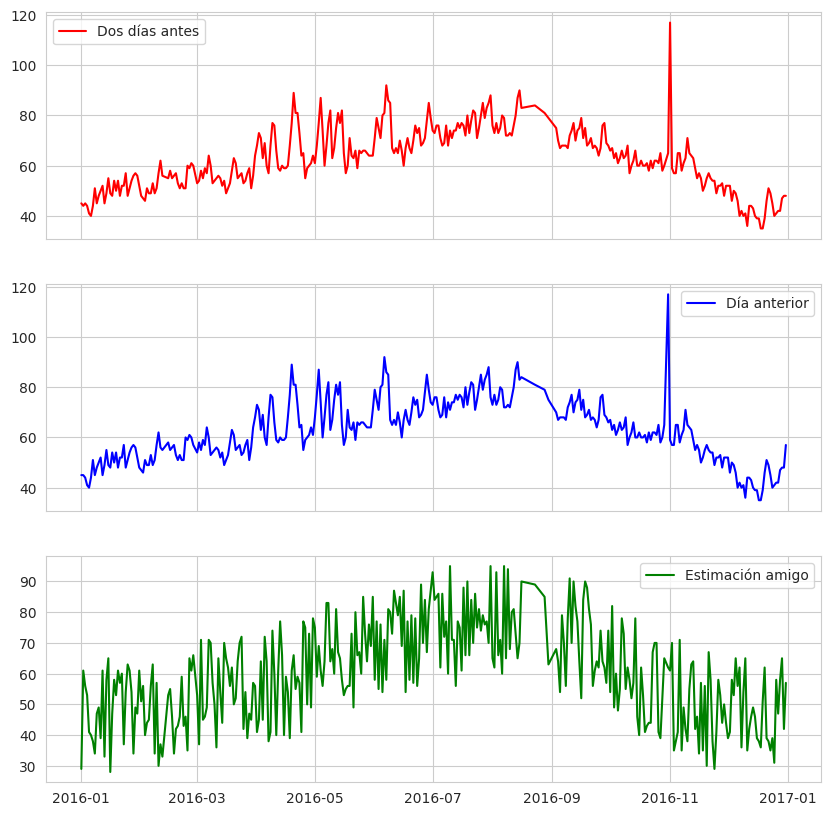

In [48]:
# Crear una columna de fecha a partir de las columnas 'year', 'month' y 'day'
temps['Fecha'] = pd.to_datetime(temps[['year', 'month', 'day']])

# Crear una figura y un conjunto de subgráficos
fig, ax = plt.subplots()

# Dibujar las temperaturas de los dos días anteriores
ax.plot(temps['Fecha'], temps['temp_2'], label='Dos días antes')
ax.plot(temps['Fecha'], temps['temp_1'], label='Día anterior')

# Dibujar la estimación del amigo
ax.plot(temps['Fecha'], temps['friend'], label='Estimación amigo')

# Añadir una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# eliminamos la columna fecha
temps = temps.drop('Fecha', axis=1)


# Crear una columna de fecha a partir de las columnas 'year', 'month' y 'day'
temps['Fecha'] = pd.to_datetime(temps[['year', 'month', 'day']])

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(3, sharex=True, figsize=(10, 10))

# Dibujar las temperaturas de los dos días anteriores en subgráficos separados
axs[0].plot(temps['Fecha'], temps['temp_2'], color='red', label='Dos días antes')
axs[1].plot(temps['Fecha'], temps['temp_1'], color='blue', label='Día anterior')

# Dibujar la estimación del amigo en un subgráfico separado
axs[2].plot(temps['Fecha'], temps['friend'], color='green', label='Estimación amigo')

# Añadir una leyenda a cada subgráfico
for ax in axs:
    ax.legend()

# Mostrar el gráfico
plt.show()

# eliminamos la columna fecha
temps = temps.drop('Fecha', axis=1)

El gráfico proporciona una visualización clara de las temperaturas de los dos días anteriores y la estimación del amigo en relación con la fecha. Aquí hay algunos comentarios basados en la interpretación del gráfico:

Tendencias Temporales: Se puede observar cómo cambian las temperaturas de los dos días anteriores y la estimación del amigo a lo largo del tiempo. Esto puede ayudar a identificar patrones estacionales o tendencias a largo plazo en los datos.

Relación entre Variables: Comparar las temperaturas de los días anteriores con la estimación del amigo puede ser útil para evaluar la precisión de la estimación. Si la estimación del amigo sigue de cerca las temperaturas reales de los días anteriores, podría indicar que la estimación es confiable. Por otro lado, grandes discrepancias podrían indicar que la estimación del amigo no es precisa.

Variabilidad: Se puede observar la variabilidad en las temperaturas de los dos días anteriores y la estimación del amigo. Esta variabilidad puede deberse a diversos factores, como cambios en las condiciones climáticas reales o en la percepción subjetiva del amigo sobre el clima.

Eventos Anómalos: Buscar picos o caídas repentinas en las temperaturas o en la estimación del amigo puede ayudar a identificar eventos anómalos o atípicos. Estos eventos podrían ser causados por condiciones climáticas extremas u otros factores inesperados.

En resumen, el gráfico proporciona una forma efectiva de visualizar y analizar las temperaturas de los días anteriores y la estimación del amigo en relación con la fecha. Ayuda a comprender mejor la dinámica del clima y la precisión de la estimación del amigo.

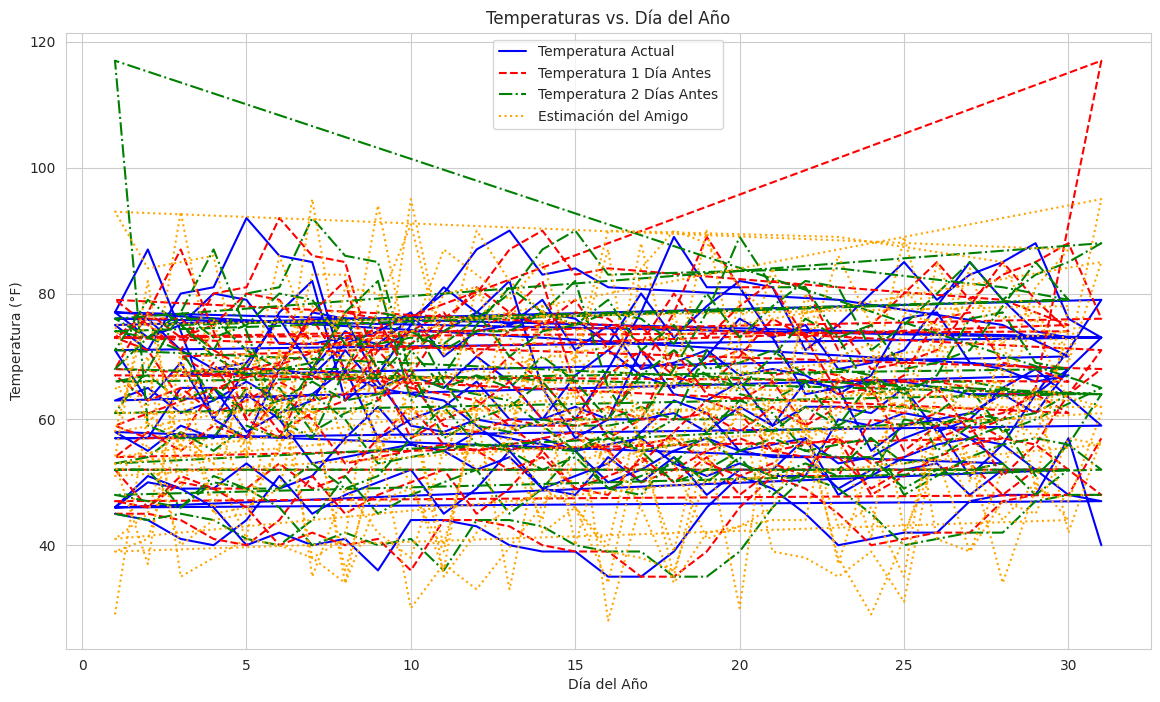

In [49]:
# Establecer el estilo de los gráficos
sns.set_style("whitegrid")

# Graficar las temperaturas máximas históricas, las temperaturas de los dos días anteriores y la estimación del amigo con respecto a la fecha
plt.figure(figsize=(14, 8))
plt.plot(temps['day'], temps['actual'], label='Temperatura Actual', color='blue')
plt.plot(temps['day'], temps['temp_1'], label='Temperatura 1 Día Antes', color='red', linestyle='--')
plt.plot(temps['day'], temps['temp_2'], label='Temperatura 2 Días Antes', color='green', linestyle='-.')
plt.plot(temps['day'], temps['friend'], label='Estimación del Amigo', color='orange', linestyle=':')
plt.xlabel('Día del Año')
plt.ylabel('Temperatura (°F)')
plt.title('Temperaturas vs. Día del Año')
plt.legend()
plt.show()


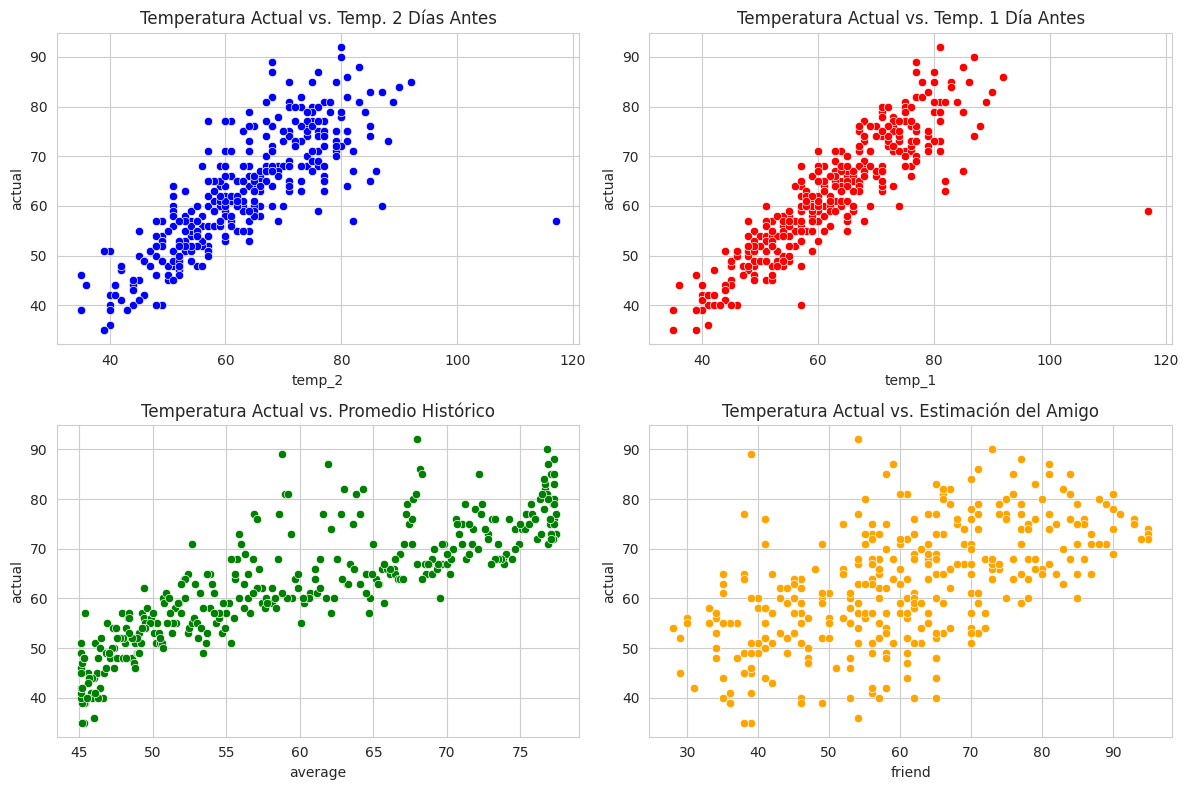

In [50]:
# Establecer el estilo de los gráficos
sns.set_style("whitegrid")

# Crear una matriz de gráficos de dispersión
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp_2', y='actual', data=temps, color='blue')
plt.title('Temperatura Actual vs. Temp. 2 Días Antes')

plt.subplot(2, 2, 2)
sns.scatterplot(x='temp_1', y='actual', data=temps, color='red')
plt.title('Temperatura Actual vs. Temp. 1 Día Antes')

plt.subplot(2, 2, 3)
sns.scatterplot(x='average', y='actual', data=temps, color='green')
plt.title('Temperatura Actual vs. Promedio Histórico')

plt.subplot(2, 2, 4)
sns.scatterplot(x='friend', y='actual', data=temps, color='orange')
plt.title('Temperatura Actual vs. Estimación del Amigo')

plt.tight_layout()
plt.show()



Temperatura Actual vs. Temp. 2 Días Antes:
Este gráfico muestra la relación entre la temperatura actual y la temperatura máxima dos días antes. Si la temperatura actual está correlacionada con la temperatura pasada, esperaríamos ver una tendencia positiva en los datos. Si hay una anomalía, podríamos ver puntos dispersos que se desvían de esta tendencia.

Temperatura Actual vs. Temp. 1 Día Antes:
Similar al gráfico anterior, pero ahora estamos comparando la temperatura actual con la temperatura máxima del día anterior. Este gráfico nos ayuda a evaluar si hay una correlación más fuerte entre la temperatura actual y la temperatura del día anterior en comparación con la temperatura de hace dos días.

Temperatura Actual vs. Promedio Histórico:
Aquí, comparamos la temperatura actual con el promedio histórico de temperaturas máximas. Esto nos permite ver cómo se desvían las temperaturas actuales del promedio histórico. Si hay anomalías, podríamos ver puntos que están significativamente por encima o por debajo del promedio histórico.

Temperatura Actual vs. Estimación del Amigo:
En este gráfico, contrastamos la temperatura actual con la estimación del amigo. Esto nos ayuda a evaluar qué tan precisa es la estimación del amigo en comparación con las temperaturas reales. Si hay discrepancias significativas, podríamos ver puntos dispersos o una falta de correlación clara entre las dos variables.

## *Preparación de la data:*

### 3. Recodifique los días de la semana, creando siete variables 1-0 asociados a los días de la semana. Le puede facilitar el proceso usando get_dummies de la librería Pandas.

In [51]:
# Supongamos que 'dias_semana' es tu columna con los días de la semana
dummies = pd.get_dummies(temps['week'], prefix='week')

# Ahora 'dias_dummies' es un DataFrame con una columna para cada día de la semana,
# donde 1 indica que el día de la semana es ese día y 0 indica que no lo es.

# Para añadir estas nuevas columnas a tu DataFrame original, puedes usar la función concat():
temps = pd.concat([temps, dummies], axis=1)

# Y finalmente, puedes eliminar la columna original 'dias_semana' si ya no la necesitas:
temps = temps.drop('week', axis=1)

# Convertir las columnas de booleanos a enteros
for col in ['week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed']:
    temps[col] = temps[col].astype(int)

#mostra los datos del dataframe como una tabla de horizontal con celdas y bordes
print(temps.to_string(index=False))

 year  month  day  temp_2  temp_1  average  actual  forecast_noaa  forecast_acc  forecast_under  friend  week_Fri  week_Mon  week_Sat  week_Sun  week_Thurs  week_Tues  week_Wed
 2016      1    1      45      45     45.6      45             43            50              44      29         1         0         0         0           0          0         0
 2016      1    2      44      45     45.7      44             41            50              44      61         0         0         1         0           0          0         0
 2016      1    3      45      44     45.8      41             43            46              47      56         0         0         0         1           0          0         0
 2016      1    4      44      41     45.9      40             44            48              46      53         0         1         0         0           0          0         0
 2016      1    5      41      40     46.0      44             46            46              46      41         0  

### 4. Ahora, separe los datos en predictores y variable respuesta. Su variable Y es la temperatura máxima real y los predictores son todas las columnas que usa el modelo para hacer una predicción. Asegúrese de transformar en una matriz Numpy porque esa es la forma en que funciona el algoritmo.

In [55]:
# Separar la variable respuesta (Y) de los predictores (X)
Y = temps['actual']  # Temperatura máxima real
X = temps.drop('actual', axis=1)  # Todas las columnas excepto 'actual' son predictores

# Convertir los datos de los predictores y la variable respuesta en matrices NumPy
X = X.to_numpy()
Y = Y.to_numpy()

# Verificar las formas de las matrices resultantes
print("Forma de la matriz de predictores (X):", X.shape)
print("Forma de la matriz de variable respuesta (Y):", Y.shape)

Forma de la matriz de predictores (X): (348, 17)
Forma de la matriz de variable respuesta (Y): (348,)


In [56]:
# Definir la variable respuesta
Y = temps['actual'].values

# Definir los predictores
X = temps.drop('actual', axis=1).values

# Mostrar las primeras filas de Y
print("Primeras filas de Y:")
print(Y[:5])

# Mostrar las primeras filas de X
print("\nPrimeras filas de X:")
print(X[:5])

Primeras filas de Y:
[45 44 41 40 44]

Primeras filas de X:
[[2.016e+03 1.000e+00 1.000e+00 4.500e+01 4.500e+01 4.560e+01 4.300e+01
  5.000e+01 4.400e+01 2.900e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 2.000e+00 4.400e+01 4.500e+01 4.570e+01 4.100e+01
  5.000e+01 4.400e+01 6.100e+01 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 3.000e+00 4.500e+01 4.400e+01 4.580e+01 4.300e+01
  4.600e+01 4.700e+01 5.600e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 4.000e+00 4.400e+01 4.100e+01 4.590e+01 4.400e+01
  4.800e+01 4.600e+01 5.300e+01 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00]
 [2.016e+03 1.000e+00 5.000e+00 4.100e+01 4.000e+01 4.600e+01 4.600e+01
  4.600e+01 4.600e+01 4.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00]]


### 5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla (random_state = 42) para obtener los mismos valores.

In [57]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (75/25) con una semilla para reproducibilidad
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de Y_train:", Y_train.shape)
print("Forma de Y_test:", Y_test.shape)

Forma de X_train: (261, 17)
Forma de X_test: (87, 17)
Forma de Y_train: (261,)
Forma de Y_test: (87,)


In [58]:
#Otra forma
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:")
print(X_train.shape, Y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print(X_test.shape, Y_test.shape)

Dimensiones del conjunto de entrenamiento:
(261, 17) (261,)

Dimensiones del conjunto de prueba:
(87, 17) (87,)


### 6. Cree una línea de base, es decir, el error que obtendremos si simplemente predijéramos la temperatura máxima promedio para todos los días

In [60]:
# Calcular la temperatura máxima promedio
average_max_temp = np.mean(Y_train)

# Crear un array con la temperatura máxima promedio para todas las predicciones
baseline_preds = np.full((len(Y_test),), average_max_temp)

# Calcular el MAE de la línea de base
baseline_error = mean_absolute_error(Y_test, baseline_preds)

# Imprimir el MAE de la línea de base
print(f"El error absoluto medio de la línea de base es {baseline_error}")

El error absoluto medio de la línea de base es 9.581758928964636


## *Ajuste del modelo:*

### 7. Ajuste un modelo de regresión de bosque aleatorio con los datos de entrenamiento. Implemente 1000 árboles y use la misma semilla declarada en el punto 5.

In [63]:
# Convertir X_train y X_test a DataFrames de pandas
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Seleccionar solo las columnas categóricas
cat_columns = X_train.select_dtypes(include=['object']).columns

# Realizar la codificación one-hot de las columnas categóricas
X_train = pd.get_dummies(X_train, columns=cat_columns)
X_test = pd.get_dummies(X_test, columns=cat_columns)

# Asegurarse de que ambos conjuntos tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Rellenar los valores faltantes en X_test con ceros
X_test = X_test.fillna(0)

# Crear el modelo de bosque aleatorio
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

### 8. Obtenga la predicción. Coméntalo.

In [67]:
# Generar las predicciones
Y_pred = rf.predict(X_test)

# Imprimir las predicciones
print(Y_pred)

[69.857 61.319 51.891 61.321 66.463 70.162 78.848 75.786 62.121 74.078
 63.647 72.176 38.472 62.433 71.594 56.012 60.943 56.995 56.748 76.113
 63.758 54.401 66.493 62.468 58.786 53.032 66.769 46.448 62.122 80.176
 73.833 64.313 55.188 81.972 74.178 61.695 53.636 51.424 68.929 42.452
 70.385 57.373 76.172 42.396 61.098 74.08  52.745 81.369 53.325 42.487
 46.507 42.144 64.17  65.709 74.13  61.339 55.177 59.945 54.651 59.664
 65.491 50.052 60.849 70.188 60.062 59.236 71.743 69.796 76.83  41.32
 76.868 56.783 60.378 50.519 54.426 64.003 43.711 74.354 47.306 52.326
 53.526 68.21  73.607 72.658 63.243 57.175 46.04 ]


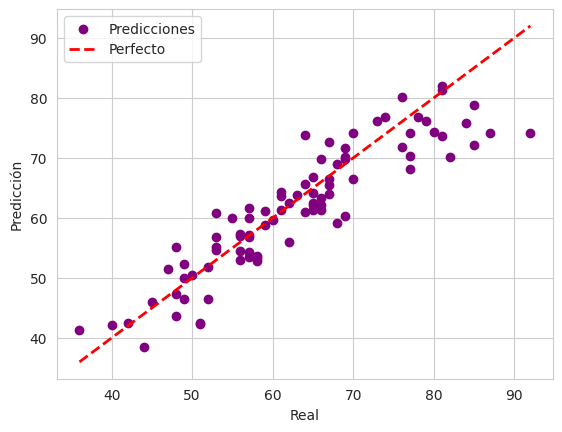

In [65]:
# Crear una gráfica de dispersión para las predicciones frente a los valores reales
plt.scatter(Y_test, Y_pred, color='purple', label='Predicciones')

# Crear la línea de predicciones perfectas
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Perfecto')

# Etiquetas de los ejes
plt.xlabel('Real')
plt.ylabel('Predicción')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

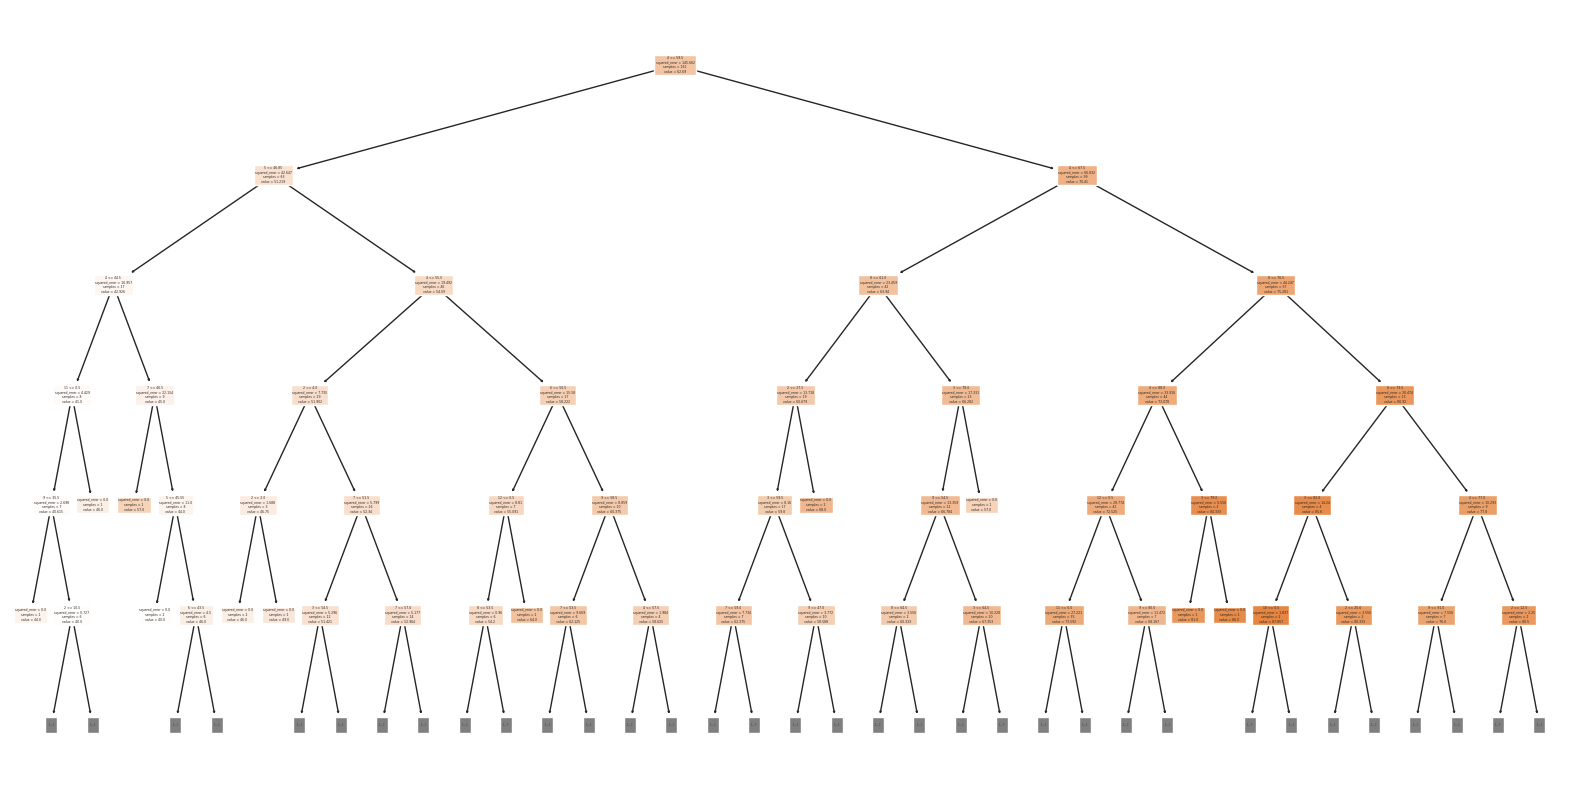

In [68]:
# Seleccionar un árbol del bosque aleatorio
estimator = rf.estimators_[5]

# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=X_train.columns, max_depth=5)
plt.show()

Al obtener las predicciones del modelo de bosque aleatorio, es importante analizarlas para comprender su rendimiento y evaluar la capacidad del modelo para generalizar a nuevos datos. Aquí hay algunos comentarios al respecto:

Comparación con los valores reales: Es crucial comparar las predicciones con los valores reales de la temperatura máxima en el conjunto de prueba. Esto nos permitirá evaluar la precisión del modelo y entender si está haciendo predicciones útiles.

Evaluación del error: Además de comparar directamente las predicciones con los valores reales, también es útil calcular métricas de evaluación del rendimiento del modelo, como el error medio absoluto (MAE), el error cuadrático medio (MSE) o el coeficiente de determinación (R^2). Estas métricas nos darán una medida cuantitativa del rendimiento del modelo.

Visualización de las predicciones: Visualizar las predicciones junto con los valores reales en un gráfico puede proporcionar una comprensión más intuitiva del rendimiento del modelo. Esto nos permite identificar patrones, tendencias o discrepancias entre las predicciones y los valores reales.

Interpretación de las predicciones: Es importante interpretar las predicciones en el contexto del problema en cuestión. ¿El modelo está capturando correctamente las tendencias y patrones esperados en los datos? ¿Hay casos en los que el modelo tenga dificultades para hacer predicciones precisas?

### 9. Obtenga las métricas de precisión

In [69]:
# Hacer predicciones en el conjunto de prueba
Y_pred = rf.predict(X_test)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calcular el error cuadrado medio raíz (RMSE)
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(Y_test, Y_pred)

# Imprimir las métricas de manera más amigable para el usuario
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrado Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrado Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Absoluto Medio (MAE): 3.87
Error Cuadrado Medio (MSE): 26.03
Raíz del Error Cuadrado Medio (RMSE): 5.10
Coeficiente de Determinación (R^2): 0.81


### 10. ¿Considera que el modelo es adecuado?

Error Absoluto Medio (MAE): El MAE es 3.87, lo que significa que, en promedio, las predicciones se desvían en 3.87 unidades del valor real. Esta métrica ofrece una medida directa de la diferencia entre las predicciones y los valores reales.

Error Cuadrado Medio (MSE): El MSE es 26.03, representando la media de los errores al cuadrado entre las predicciones y los valores reales. Valores más bajos indican un mejor rendimiento del modelo.

Raíz del Error Cuadrado Medio (RMSE): El RMSE es 5.10, siendo la raíz cuadrada del MSE y proporcionando una medida de la dispersión de los errores. Cuanto menor sea el RMSE, mejor será el modelo.

Coeficiente de Determinación (R^2): El (R^2) es 0.81, indicando que el modelo puede explicar aproximadamente el 81% de la variabilidad en los datos. Un valor más cercano a 1 sugiere un mejor ajuste del modelo.

En resumen, estas métricas ofrecen información sobre la precisión y el rendimiento general del modelo.

Para determinar si el modelo de regresión de bosque aleatorio es adecuado, es importante considerar varios factores:

Precisión del modelo: Evaluar las métricas de precisión, como el error medio absoluto (MAE), el error cuadrático medio (MSE) y el coeficiente de determinación (R^2). Si estas métricas son aceptables y muestran un buen rendimiento del modelo en los datos de prueba, es un indicio de que el modelo puede ser adecuado.
Comparación con la línea base: Comparar el rendimiento del modelo con una línea base simple, como predecir la temperatura máxima promedio para todos los días. Si el modelo supera significativamente la línea base, sugiere que está capturando patrones útiles en los datos y proporcionando predicciones mejores que simplemente usar la media.

Interpretación de resultados: Analizar las predicciones del modelo y comprender si están en línea con el conocimiento experto del dominio. ¿El modelo está capturando las relaciones esperadas entre las variables de entrada y la temperatura máxima? ¿Hay casos en los que el modelo está teniendo dificultades para hacer predicciones precisas?

Estabilidad del modelo: Evaluar la estabilidad del modelo realizando pruebas de sensibilidad o validación cruzada. Si el rendimiento del modelo es consistente en diferentes subconjuntos de datos o a lo largo del tiempo, es un indicio de que el modelo es robusto y confiable.

En resumen, basado en las métricas de precisión como la interpretación de los resultados en el contexto del problema en cuestión, en que se obtuvo un MAE bajo, MSE y RMSE bajos, y un alto (R^2) son indicativos de un buen modelo predictivo.; el modelo proporciona predicciones que se alinean con el conocimiento experto del dominio, y supera una línea base simple, asi que el modelo sería adecuado.